# Prediction of burned areas of forest fires.

This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data

## 1. Problem Definition

> How well can we predict the burned area from forest fires by using meteorological and other data.

## 2. Data

The data is downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Forest+Fires

#### Data Set Information:

In [Cortez and Morais, 2007], the output 'area' was first transformed with a ln(x+1) function.
Then, several Data Mining methods were applied. After fitting the models, the outputs were
post-processed with the inverse of the ln(x+1) transform. Four different input setups were
used. The experiments were conducted using a 10-fold (cross-validation) x 30 runs. Two
regression metrics were measured: MAD and RMSE. A Gaussian support vector machine (SVM) fed
with only 4 direct weather conditions (temp, RH, wind and rain) obtained the best MAD value:
12.71 +- 0.01 (mean and confidence interval within 95% using a t-student distribution). The
best RMSE was attained by the naive mean predictor. An analysis to the regression error curve
(REC) shows that the SVM model predicts more examples within a lower admitted error. In effect,
the SVM model predicts better small fires, which are the majority. 

## 3. Evaluation

The evaluation metrics for this project is the regression error.

## 4. Features

1. `X `- x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. `Y `- y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. `month` - month of the year: 'jan' to 'dec'
4. `day` - day of the week: 'mon' to 'sun'
5. `FFMC` - FFMC (Fine Fuel Moisture Code) index from the FWI system: 18.7 to 96.20
6. `DMC` - DMC (Dufe moisture Code) index from the FWI system: 1.1 to 291.3
7. `DC` - DC (Drought Code) index from the FWI (Fire Weather Index) system: 7.9 to 860.6
8. `ISI` - ISI (Initial Spread Index) index from the FWI system: 0.0 to 56.10
9. `temp` - temperature in Celsius degrees: 2.2 to 33.30
10. `RH` - relative humidity in %: 15.0 to 100
11. `wind` - wind speed in km/h: 0.40 to 9.40
12. `rain` - outside rain in mm/m2 : 0.0 to 6.4
13. `area` - the burned area of the forest (in ha): 0.00 to 1090.84 

`FFMC`: Denotes the moisture content surface litter and influences ignition and fire spread. 

`DMC and DC`: Represent the moisture content of shallow and deep organic layers, which affect fire intensity.

`ISI`: Score that correlates with fire velocity spread.

In [21]:
!pip install dabl

  Created wheel for dabl: filename=dabl-0.1.8-py3-none-any.whl size=565081 sha256=a40a333e58e3b75560d4807425064496fd5264e39019cb746fdcd63e8a2aaba9
  Stored in directory: c:\users\sandra\appdata\local\pip\cache\wheels\6d\99\b3\c1bfea80b3baa5df9b1a1f91fcc29dbce50566a507e863eb69
Successfully built dabl


In [36]:
!pip install dc_stat_think

In [281]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dabl


In [10]:
# Importing and visualizing data
df = pd.read_csv('forestfires.csv', parse_dates=['month', 'day'])
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
# Describing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [8]:
# Checking for missing values
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [9]:
df.shape

(517, 13)

In [24]:
# Copying dataset to apply changes
df_temp = df.copy()
df_temp

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [15]:
df_temp['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [16]:
df_temp.day.value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

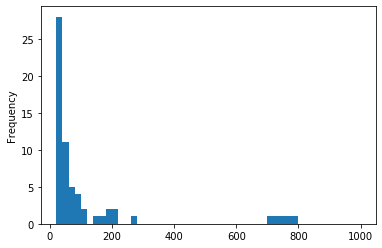

In [20]:
df.area.plot.hist(bins=[20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,400,500,600,700,800,900,1000])

In [27]:
# Encoding the month column
df_temp['month'] = df_temp['month'].replace('jan', 1)
df_temp['month'] = df_temp['month'].replace('feb', 2)
df_temp['month'] = df_temp['month'].replace('mar', 3)
df_temp['month'] = df_temp['month'].replace('apr', 4)
df_temp['month'] = df_temp['month'].replace('may', 5)
df_temp['month'] = df_temp['month'].replace('jun', 6)
df_temp['month'] = df_temp['month'].replace('jul', 7)
df_temp['month'] = df_temp['month'].replace('aug', 8)
df_temp['month'] = df_temp['month'].replace('sep', 9)
df_temp['month'] = df_temp['month'].replace('oct', 10)
df_temp['month'] = df_temp['month'].replace('nov', 11)
df_temp['month'] = df_temp['month'].replace('dec', 12)

df_temp.month.value_counts()

8     184
9     172
3      54
7      32
2      20
6      17
10     15
12      9
4       9
5       2
1       2
11      1
Name: month, dtype: int64

In [28]:
# Encoding day column
df_temp['day'] = df_temp['day'].replace('sun', 1)
df_temp['day'] = df_temp['day'].replace('mon', 2)
df_temp['day'] = df_temp['day'].replace('tue', 3)
df_temp['day'] = df_temp['day'].replace('wed', 4)
df_temp['day'] = df_temp['day'].replace('thu', 5)
df_temp['day'] = df_temp['day'].replace('fri', 6)
df_temp['day'] = df_temp['day'].replace('sat', 7)
df_temp['day']

0      6
1      3
2      7
3      6
4      1
      ..
512    1
513    1
514    1
515    7
516    3
Name: day, Length: 517, dtype: int64

In [29]:
df_temp.head(8)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,1,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,2,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,2,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0


In [31]:
# Sorting the data in chronological order
df_temp.sort_values(by=['month', 'day'], inplace=True)
df_temp

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
379,4,5,1,1,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00
104,2,4,1,7,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00
182,5,4,2,1,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38
202,7,4,2,1,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
282,6,3,2,1,84.9,27.5,353.5,3.4,4.2,51,4.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,4,4,12,2,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77
281,6,5,12,3,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77
274,8,6,12,4,84.0,27.8,354.6,5.3,5.1,61,8.0,0.0,11.19
275,4,6,12,5,84.6,26.4,352.0,2.0,5.1,61,4.9,0.0,5.38


<Figure size 1296x432 with 0 Axes>

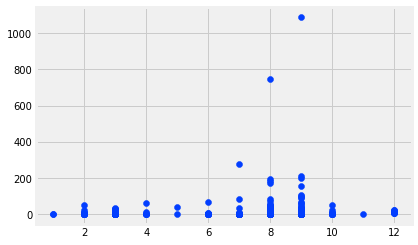

In [93]:
%matplotlib inline 
plt.figure(figsize=(18,6))
#plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.scatter(df_temp.month, df_temp.area)

As expected, in the summer months (july, august and september) are the most affected months with fire

(0, 800)

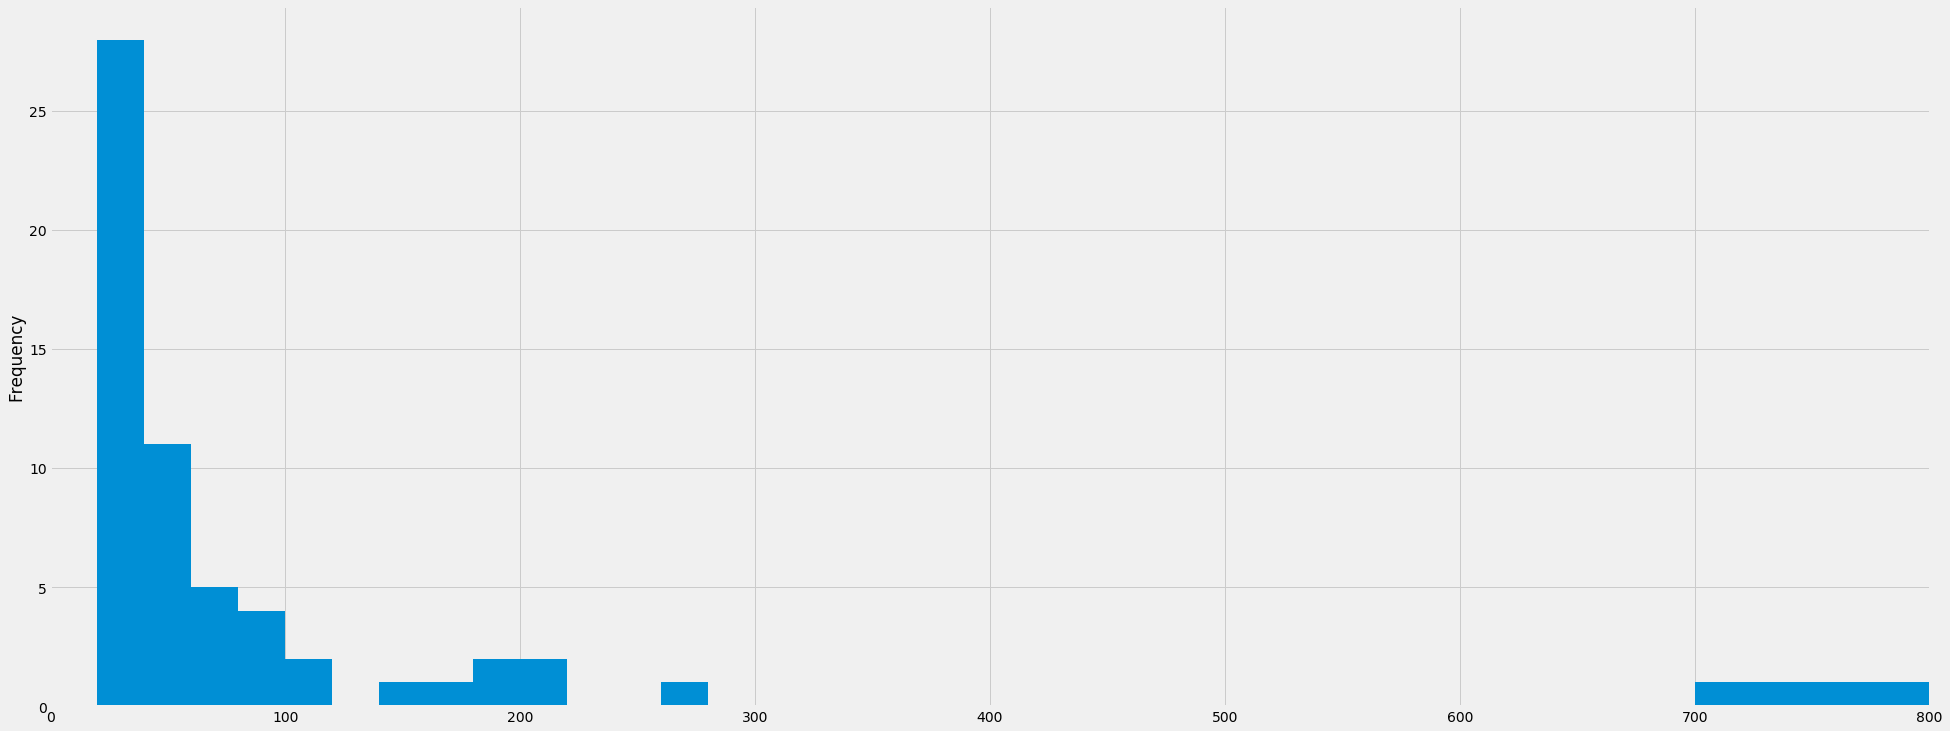

In [43]:
plt.figure(figsize=(30,12))
df_temp['area'].plot.hist(bins=[20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,400,500,600,700,800,900,1000])

plt.xlim([0,800])

The distribution follows a poisson dist. The events are independant from the other

### Descriptive Statistics and Visualization of correlations

In [44]:
df_temp.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,3.972921,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.143867,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


#### Reminder of some features
* FFMC - FFMC (Fine Fuel Moisture Code) index from the FWI system: 18.7 to 96.20

* DMC - DMC (Dufe moisture Code) index from the FWI system: 1.1 to 291.3

* DC - DC (Drought Code) index from the FWI (Fire Weather Index) system: 7.9 to 860.6

* ISI   - ISI (Initial Spread Index) index from the FWI system: 0.0 to 56.10

`FFMC`: Denotes the moisture content surface litter and influences ignition and fire spread.

`DMC and DC`: Represent the moisture content of shallow and deep organic layers, which affect fire intensity.

`ISI`: Score that correlates with fire velocity spread.

C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\dabl\plot\supervised.py:526: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\dabl\preprocessing.py:317: UserWarning: Discarding near-constant features: ['rain']
  warn("Discarding near-constant features: {}".format(


Target looks like regression


C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\dabl\plot\utils.py:620: UserWarning: Dropped 3 outliers in column FFMC.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\dabl\plot\utils.py:620: UserWarning: Dropped 1 outliers in column ISI.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\sandra\Desktop\Miniconda_projects\projects\forest_fires\env\lib\site-packages\dabl\plot\utils.py:620: UserWarning: Dropped 2 outliers in column area.
  warn("Dropped {} outliers in column {}.".format(


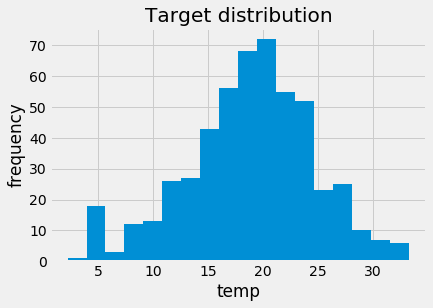

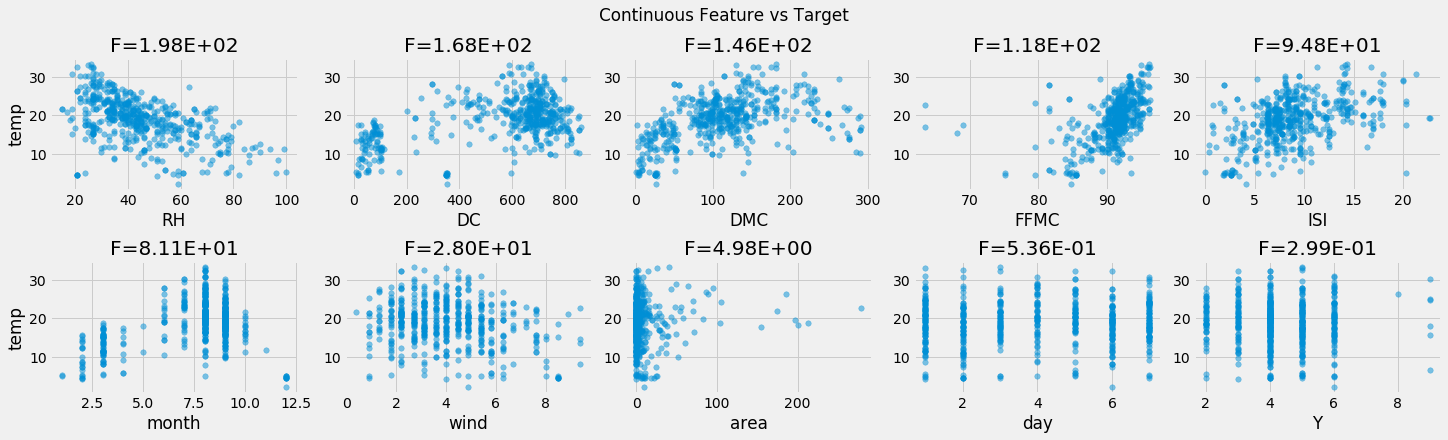

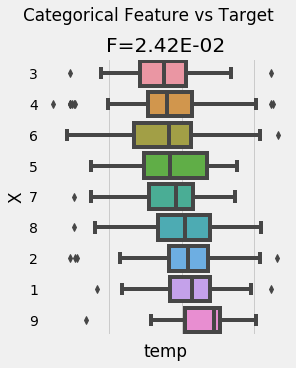

In [45]:
# Plotting the correlation of temperature variable with the other features

dabl.plot(df_temp, 'temp')

Conclusions:

From the temperature readings, we can deduce that temperature is positive correlated with DMC, FFMC, ISI, and shows  a bit of correlation with DC.

## Visualizations of statistical analysis

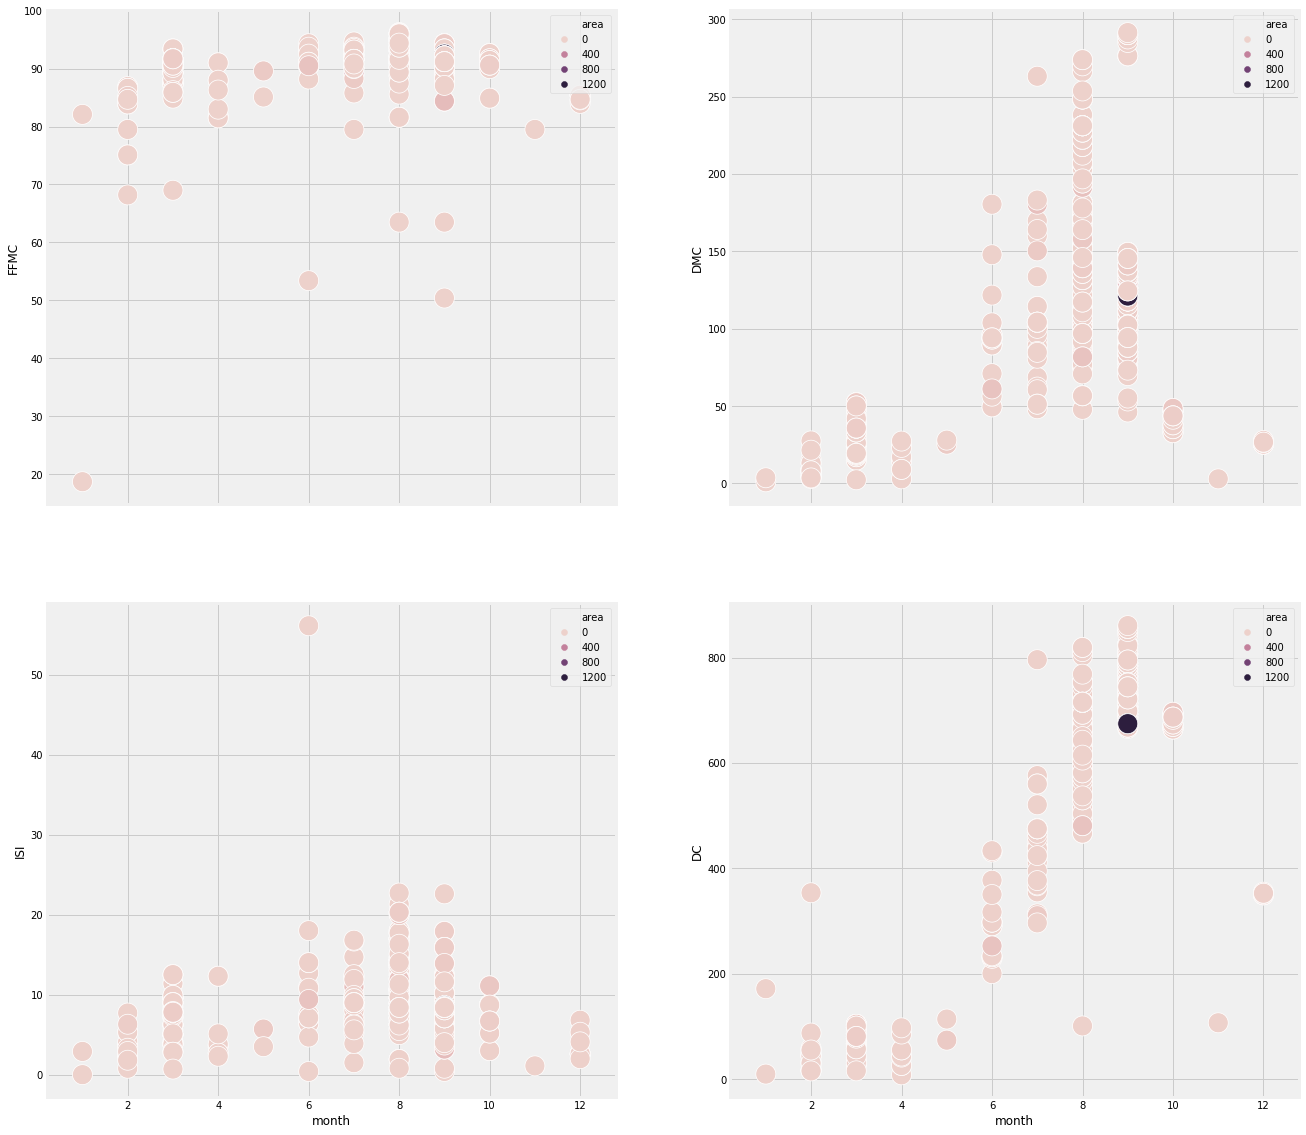

In [184]:
#Visualizing relationship between inputs with area according the month of the year

f, axes = plt.subplots(2, 2, figsize=(20, 20), sharex=True)

sns.scatterplot(x=df_temp.month, y=df_temp['FFMC'],hue=df_temp.area, ax= axes[0,0], s=400, marker = 'o')

sns.scatterplot(x=df_temp.month, y=df_temp['DMC'],hue=df_temp.area, ax= axes[0,1],s=400, marker = 'o')
sns.scatterplot(x=df_temp.month, y=df_temp['ISI'],hue=df_temp.area, ax= axes[1,0],s=400, marker = 'o')
sns.scatterplot(x=df_temp.month, y=df_temp['DC'],hue=df_temp.area, ax= axes[1,1],s=400, marker = 'o')


#### Summary

* FMMC and ISI stay almost constant along the year and shows almost no relationship with burned areas
* DC parameter shows a considerable increment during the summer times, and may have a relationship with the happening of larger forest fires.
* Similar to DC, DMC shows an increment in their values during the summer times, they may be related to the happening of largest fires.

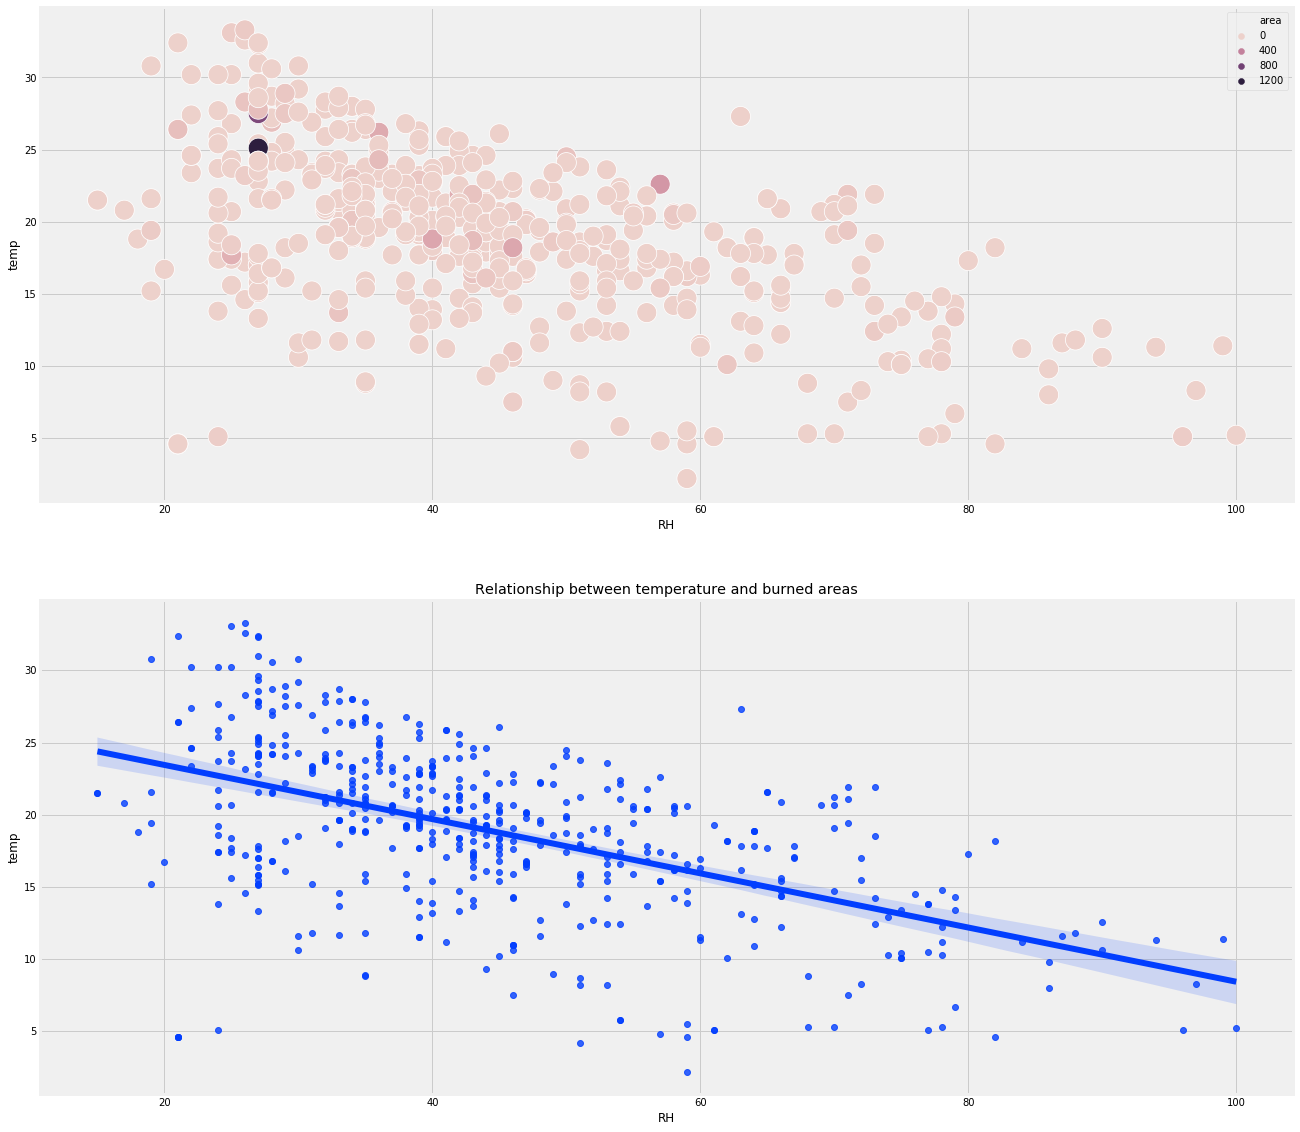

In [191]:
# Relationship between humidity and temperature with burned areas

plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.scatterplot(x=df_temp.RH, y=df_temp.temp, hue=df_temp.area,  s=400 )
plt.subplot(2,1,2)
sns.regplot(x=df_temp.RH, y=df_temp.temp)
plt.title("Relationship between temperature and burned areas")
plt.show()

Low RH and high temp had most porbability for larger areas of burn forest

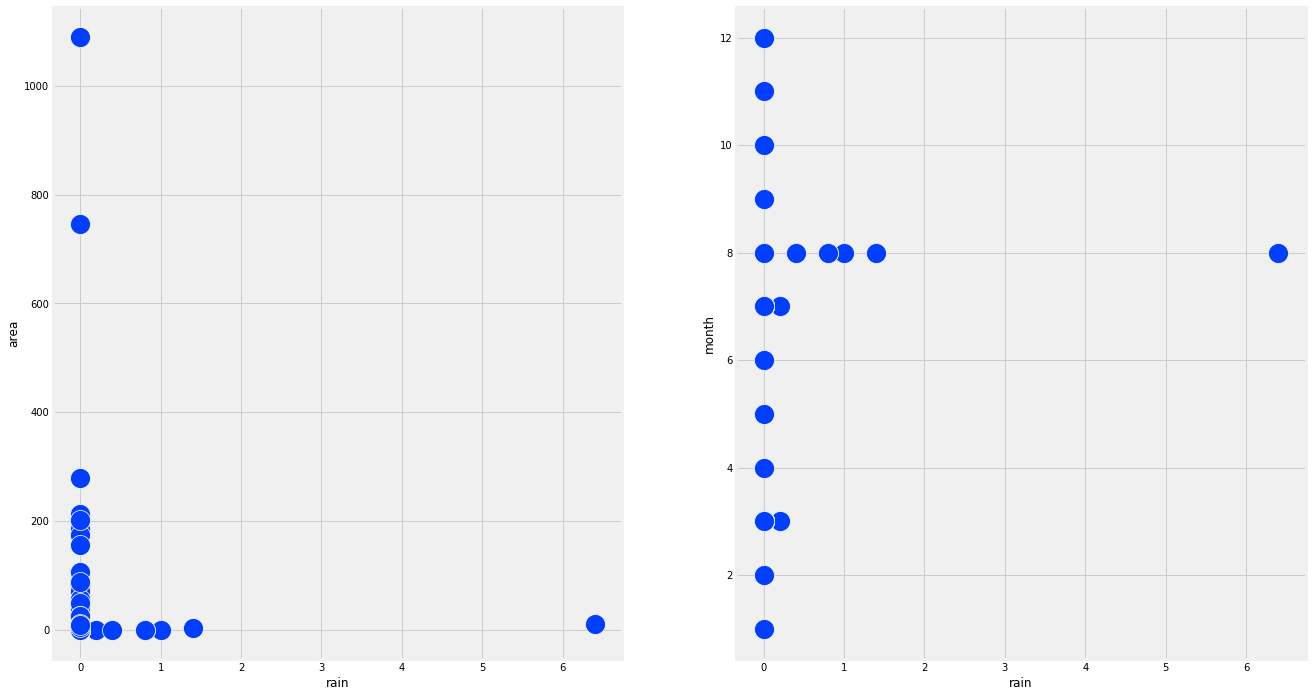

In [131]:
# Showing the relationship between rain and the burn area
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.scatterplot(x=df_temp.rain, y =df_temp.area, s =400)
plt.subplot(1,2,2)
sns.scatterplot(x=df_temp.rain, y =df_temp.month, s=400)

#### Relationship between rain and burned areas

The most affected month are the august and september. Most of the rain happen in August though. However, the fire occur when rains are not registered.

#### Summary

* Low Humidity, High temperature and not rain incur in the happening of forest fire

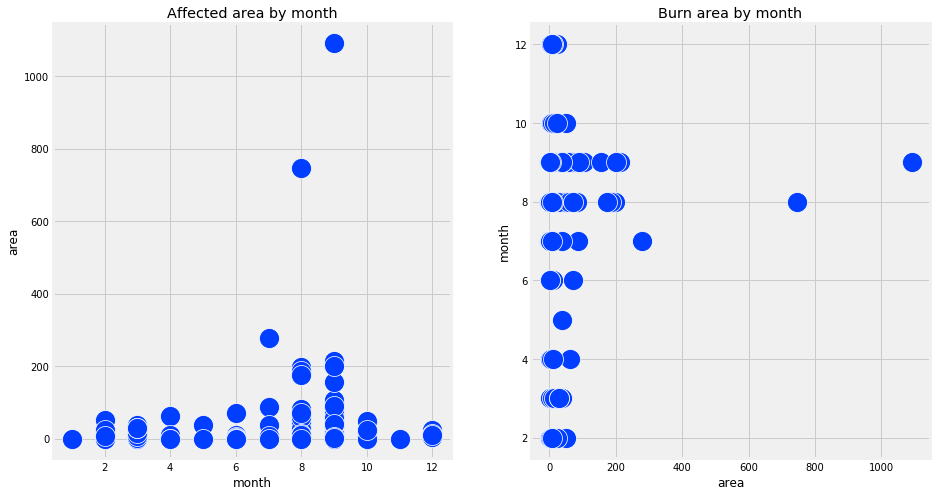

In [175]:
#Plotting the area burn by month
df_burn = df_temp[df_temp.area > 0]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,8))

ax1.set_title('Affected area by month')
sns.scatterplot(x=df_temp.month, y =df_temp.area, s =400, ax = ax1)
#plt.subplot(1,2,2)
ax2.set_title('Burn area by month')
sns.scatterplot(y=df_burn.month, x=df_burn.area, s=400, ax = ax2)


### Without outliers.

In the dataset we can spot 2 outliers, next we will remove to analyze the connection of burn area by month

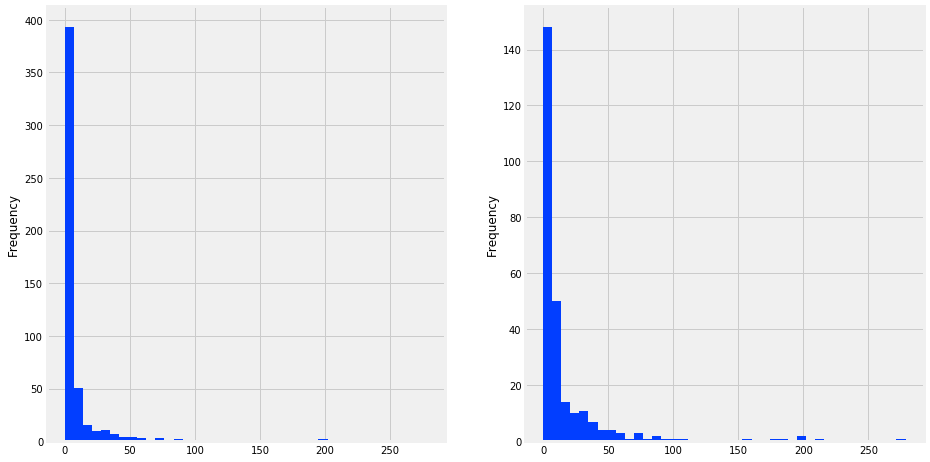

In [187]:
df_no_outlier = df_temp[df_temp.area < 600]
df_no_outlier_no_zero = df_no_outlier[df_no_outlier.area > 0]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,8))
df_no_outlier.area.plot.hist(ax = ax1, bins=40)
df_no_outlier_no_zero.area.plot.hist(ax=ax2, bins=40)

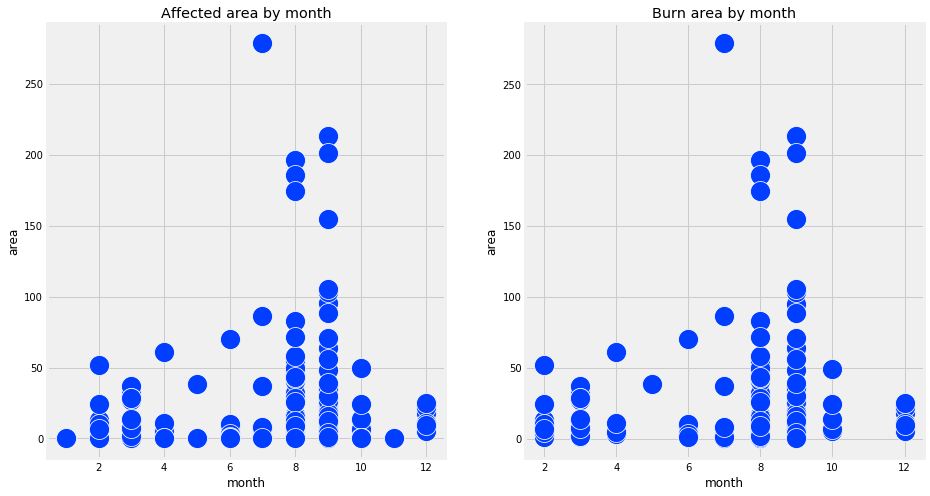

In [183]:
#Plotting the area burn by month
df_burn = df_temp[df_temp.area > 0]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,8))

ax1.set_title('Affected area by month')
sns.scatterplot(x=df_no_outlier.month, y =df_no_outlier.area, s =400, ax = ax1)
#plt.subplot(1,2,2)
ax2.set_title('Burn area by month')
sns.scatterplot(x=df_no_outlier_no_zero.month, y=df_no_outlier_no_zero.area, s=400, ax = ax2)

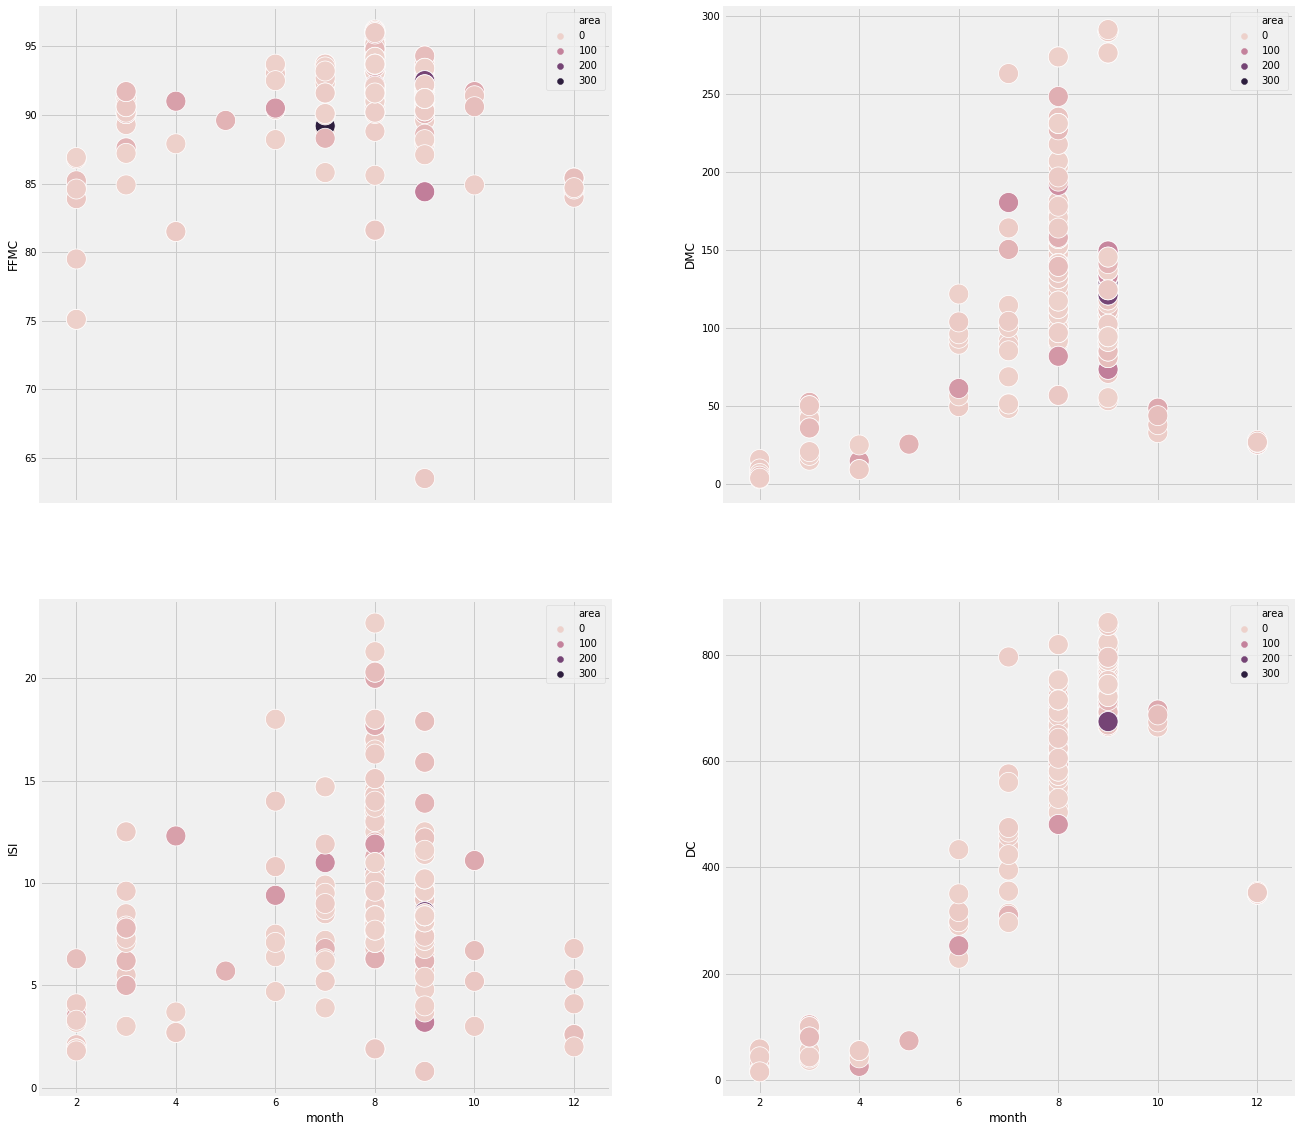

In [188]:
#Visualizing relationship between inputs with area according the month of the year

f, axes = plt.subplots(2, 2, figsize=(20, 20), sharex=True)

sns.scatterplot(x=df_no_outlier_no_zero.month, y=df_no_outlier_no_zero['FFMC'],hue=df_no_outlier_no_zero.area, ax= axes[0,0], s=400, marker = 'o')

sns.scatterplot(x=df_no_outlier_no_zero.month, y=df_no_outlier_no_zero['DMC'],hue=df_no_outlier_no_zero.area, ax= axes[0,1],s=400, marker = 'o')
sns.scatterplot(x=df_no_outlier_no_zero.month, y=df_no_outlier_no_zero['ISI'],hue=df_no_outlier_no_zero.area, ax= axes[1,0],s=400, marker = 'o')
sns.scatterplot(x=df_no_outlier_no_zero.month, y=df_no_outlier_no_zero['DC'],hue=df_no_outlier_no_zero.area, ax= axes[1,1],s=400, marker = 'o')

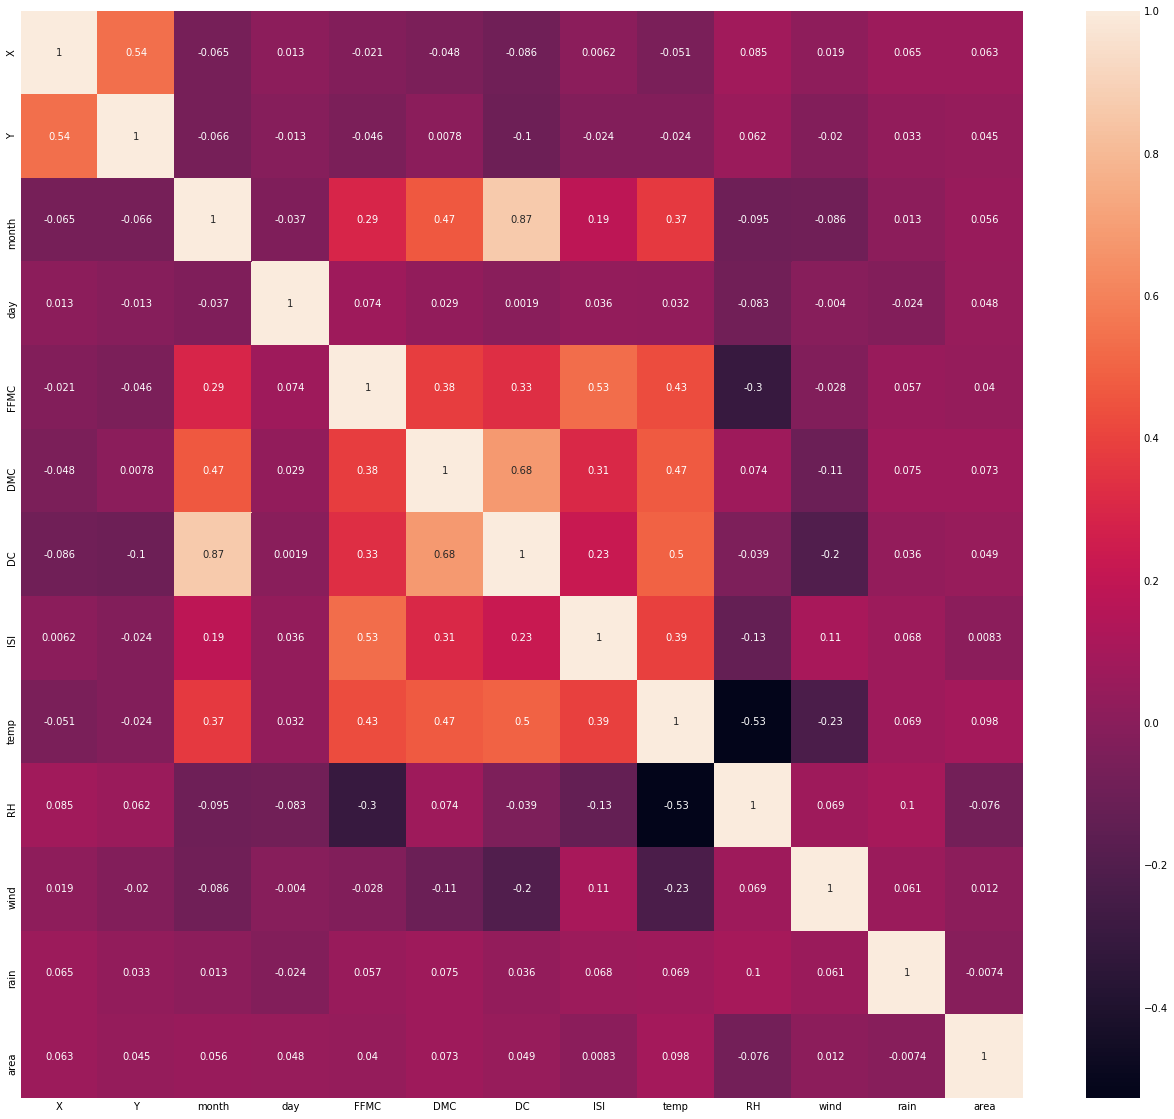

In [152]:
# Heatmap of correlation
plt.figure(figsize=(20,20))
df_corr = df_temp[df_temp.area>0]
sns.heatmap(data = df_temp.corr(), annot=True)

### Statistical Inference

#### Probabilities

In [228]:
df_burn.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,4.807407,4.366667,7.759259,3.955556,91.034074,114.707778,570.867037,9.177037,19.311111,43.733333,4.112963,0.028889,24.600185
std,2.383326,1.170740,2.115048,2.108107,3.709020,61.786520,229.981242,4.147350,6.179444,15.080059,1.884573,0.398392,86.501635
min,1.000000,2.000000,2.000000,1.000000,63.500000,3.200000,15.300000,0.800000,2.200000,15.000000,0.400000,0.000000,0.090000
25%,3.000000,4.000000,8.000000,2.000000,90.325000,82.900000,486.500000,6.800000,16.125000,33.000000,2.700000,0.000000,2.140000
50%,5.000000,4.000000,8.000000,4.000000,91.700000,111.700000,665.600000,8.400000,20.100000,41.000000,4.000000,0.000000,6.370000
75%,7.000000,5.000000,9.000000,6.000000,92.975000,141.300000,721.325000,11.375000,23.400000,53.000000,4.900000,0.000000,15.422500
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,22.700000,33.300000,96.000000,9.400000,6.400000,1090.840000


We will assume as a hazardly forest fire those that can end up covering from that 50 hectareas (ha)

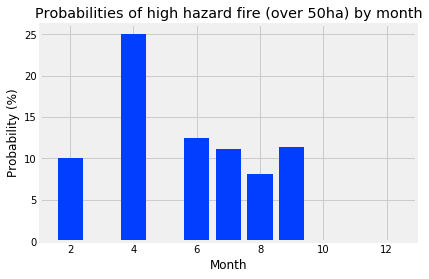

In [227]:
# Probabilities of high burned areas by month 

probabilities_burned_area_by_month = { }
for i in df_burn.month.unique():
    prob = round((len(df_burn[(df_burn.area > 50) & (df_burn.month == i)]) / len(df_burn[df_burn.month == i]))*100,2)
    probabilities_burned_area_by_month[i] = prob

probabilities_burned_area_by_month

plt.bar(x = probabilities_burned_area_by_month.keys(), height = probabilities_burned_area_by_month.values())
plt.title("Probabilities of high hazard fire (over 50ha) by month")
plt.xlabel("Month")
plt.ylabel("Probability (%)");
plt.show()

In [229]:
# Comparation of probabilities of high burned areas when temperature, FFMC, DMC,DC and ISI over and below the mean
prob_high_features_area = { }
prob_low_features_area = { }
features = ['temp', 'FFMC', 'DMC', 'DC', 'ISI', 'RH', 'wind', 'rain']
for i in features:
    prob_high = round((len(df_burn[(df_burn.area > 50) & (df_burn[i] > df_burn[i].mean())]) / len(df_burn.area))*100,2)
    prob_low = round((len(df_burn[(df_burn.area > 50) & (df_burn[i] < df_burn[i].mean())]) / len(df_burn.area))*100,2)
    prob_high_features_area[i] = prob_high
    prob_low_features_area[i] = prob_low

print(prob_high_features_area, prob_low_features_area)


{'temp': 6.3, 'FFMC': 5.56, 'DMC': 5.56, 'DC': 6.3, 'ISI': 2.96, 'RH': 2.22, 'wind': 3.33, 'rain': 0.0} {'temp': 2.59, 'FFMC': 3.33, 'DMC': 3.33, 'DC': 2.59, 'ISI': 5.93, 'RH': 6.67, 'wind': 5.56, 'rain': 8.89}


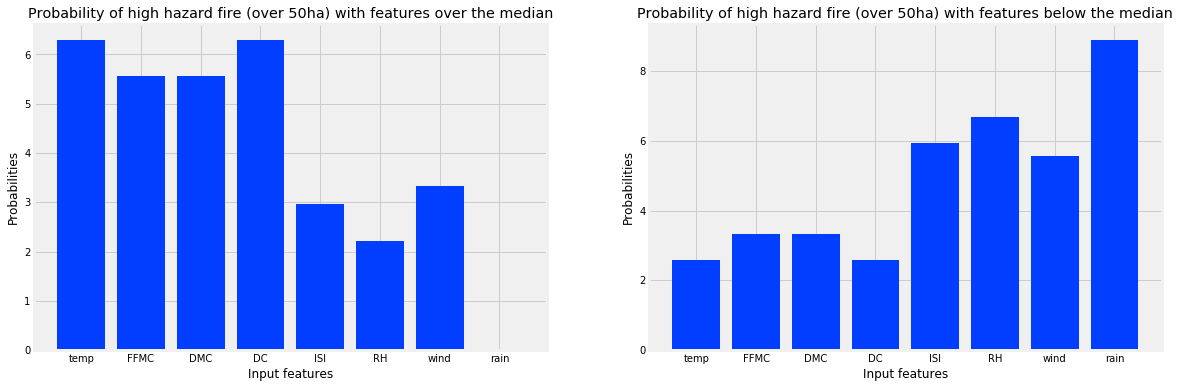

In [261]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.bar(x=prob_high_features_area.keys(), height=prob_high_features_area.values())

plt.title("Probability of high hazard fire (over 50ha) with features over the median")
plt.xlabel("Input features")
plt.ylabel("Probabilities")
plt.subplot(1,2,2)

plt.bar(x=prob_low_features_area.keys(), height=prob_low_features_area.values())
plt.title("Probability of high hazard fire (over 50ha) with features below the median")
plt.xlabel("Input features")
plt.ylabel("Probabilities")
plt.show()

### Summary of probabilities output
* High temperature, FFMC, DMC, and DC are related to a higher probability of having long burn area by forest fire.
* Low values of rain and relative humidity increment the probability of bigger propagation of the fire.
* ISI and wind values probabilities are almost the same

### Does the wind have any effect in the expansion of the fire?

Usually the speed of the wind should produce an effect in the expansion of a forest fire. Together with other features such as humidity, FFMC and rain values. However, our data does not show a noticeable different in the wind values for high and low burn areas. We will realize a statistic analysis over this value to try to find some answers to this issue. 

Using the mean values of the wind for high hazard fire and no hazard fire we will inquire the probability of getting at least the difference of the means of these values under the hypothesis that their distributions are identicals, and whether theses values were gotten by chance


In [275]:
# Building new dataset for hazard and non-hazard burn areas
df_burn_hazard = df_burn[df_burn.area >= 50]
df_burn_no_hazard = df_burn[df_burn < 50]
len(df_burn_hazard), len(df_burn_no_hazard)

(24, 270)

In [277]:
np.mean(df_burn_hazard.wind), np.mean(df_burn_no_hazard.wind)

(3.920833333333333, 4.112962962962963)

In [278]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates




burn_area_wind_diff = diff_of_means(df_burn_hazard.wind, df_burn_no_hazard.wind)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(df_burn_hazard.wind, df_burn_no_hazard.wind,
                                 diff_of_means, size=1000)

# Compute p-value: p
#p = np.mean(perm_replicates)
p = np.sum(perm_replicates >= burn_area_wind_diff) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.671


#### Conclusion
The p-value tells you that there is about a 67.1% chance that we would get the difference of means observed in the dataset if the distributions of wind readings were the same. So, the null hypothesis is true and both wind values for low and high ha of burned areas have the same distribution and probabilities.

Values of wind speed over the median is not neccesarily related that forest fires will cover high numbers of ha.

In [279]:
# Calculating the values of temperature under the same conditions:

burn_area_temp_diff = diff_of_means(df_burn_hazard.temp, df_burn_no_hazard.temp)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(df_burn_hazard.temp, df_burn_no_hazard.temp,
                                 diff_of_means, size=1000)

# Compute p-value: p
#p = np.mean(perm_replicates)
p = np.sum(perm_replicates >= burn_area_temp_diff) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.034


#### Results
For temperature, the p-values tell us that there is about 3.4% chance that we would get the same difference of means of the observed dataset if the distributions of temp of low and high affected areas were the same.

Therefore we will reject the null hypothesis and, as the visualizations above reflect, the distributions are not equal, in other words, they don't have the same probabilities. 

## Saving the result dataset


In [280]:
# This dataset save the reading of forest fires for areas greater than 0
df_burn.to_csv('forest_fires_affected_areas.csv')

#This dataset save the reading of forest fires for areas higher than 50 ha
df_burn_hazard.to_csv('forest_fires_high_affected_areas.csv')

#This datasetr save the reading of forest firest for areas less than 50 ha
df_burn_no_hazard.to_csv('forest_fires_low_affected_areas.csv')

# This dataset save the forest fire readings with no outliers
df_no_outlier.to_csv('forestfires_no_outliers.csv')

# This dataset save the forest fire readings for affected areas, with no outliers
df_no_outlier_no_zero.to_csv('forestfires_affected_areas_no_outliers.csv')
